In [1]:
#import libraries

%matplotlib inline

import pandas as pd
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt

In [2]:
#load stock data for technical analysis

os.chdir('C:/Users/trinh/Desktop/CEBD1260/Deliverables/Week2/Stocks')
os.listdir()[:5]

stocks=[]
csvs=[x for x in os.listdir() if x.endswith('.txt')]
csvs=[x for x in csvs if os.path.getsize(x)>0]
for csv in csvs:
    df=pd.read_csv(csv)
    df['ticker']=csv.replace('txt','')
    stocks.append(df)
stocks=pd.concat(stocks,ignore_index=True)
stocks.reset_index(inplace=True,drop=True)

print(stocks.shape)

(14887665, 8)


               Open          High           Low         Close        Volume  \
count  1.488766e+07  1.488766e+07  1.488766e+07  1.488766e+07  1.488766e+07   
mean   3.038538e+04  3.121247e+04  2.936176e+04  3.024522e+04  1.585730e+06   
std    4.202501e+06  4.323486e+06  4.046981e+06  4.180590e+06  7.635187e+06   
min    0.000000e+00  4.000000e-03 -1.000000e+00  3.700000e-03  0.000000e+00   
25%    7.750000e+00  7.884000e+00  7.610000e+00  7.750000e+00  3.280000e+04   
50%    1.568000e+01  1.591900e+01  1.543100e+01  1.568000e+01  1.922660e+05   
75%    2.890000e+01  2.927900e+01  2.850000e+01  2.889990e+01  8.917860e+05   
max    1.423713e+09  1.442049e+09  1.362118e+09  1.437986e+09  2.423735e+09   

          OpenInt  
count  14887665.0  
mean          0.0  
std           0.0  
min           0.0  
25%           0.0  
50%           0.0  
75%           0.0  
max           0.0  
Index(['Date', 'ticker'], dtype='object')
count    1.488766e+07
mean     2.692903e+00
std      1.204939e+00


Date       2674
Open       2674
High       2674
Low        2674
Close      2674
Volume     2674
OpenInt    2674
ticker     2674
lClose     2674
dtype: int64

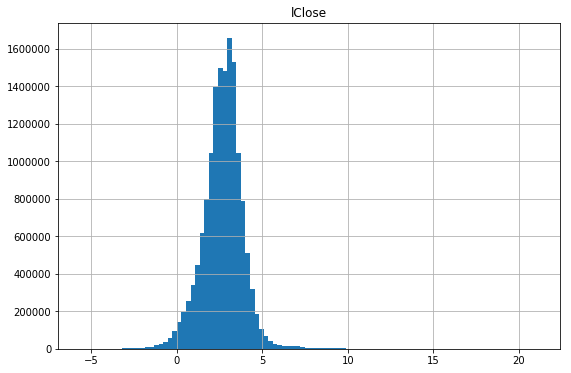

In [3]:
#exploring technical analysis data

print(stocks.describe())

##look at categorical variables
categorical=stocks.dtypes[stocks.dtypes=='object'].index
print(categorical)
stocks[categorical].describe()

#scanning for missing values
missing=np.where(stocks['Close'].isnull()==True)
len(missing[0])

stocks['lClose']=np.log(stocks['Close'])
print(stocks['lClose'].describe())

#visualize the data
stocks.hist(column='lClose',figsize=(9,6),bins=100)
stocks.sort_values(by='lClose',ascending=False)

stocks[stocks['lClose']>15].count()

In [4]:
#load fundamentals and gdp
os.chdir('C:/Users/trinh/Desktop/CEBD1260/Deliverables/Week2')
nasdaq=pd.read_csv('fundamentals_dataset.csv')
sp500=pd.read_csv('key_stats_yahoo.csv')
gdp=pd.read_csv('gdpcor.csv')

print(nasdaq.shape)
print(sp500.shape)
print(gdp.shape)

print(gdp.describe())



(186336, 6)
(9132, 33)
(285, 3)
          Date   CGDP  GDP2009
count      285    285      285
unique     285    284      285
top     1975Q2  472.8  5,292.4
freq         1      2        1


In [5]:
#GDP Describe

gdp['Date']=pd.to_datetime(gdp['Date'])+pd.offsets.QuarterEnd()
print(gdp)
print(gdp['Date'].describe())

          Date      CGDP   GDP2009
0   1947-03-31     243.1   1,934.5
1   1947-06-30     246.3   1,932.3
2   1947-09-30     250.1   1,930.3
3   1947-12-31     260.3   1,960.7
4   1948-03-31     266.2   1,989.5
5   1948-06-30     272.9   2,021.9
6   1948-09-30     279.5   2,033.2
7   1948-12-31     280.7   2,035.3
8   1949-03-31     275.4   2,007.5
9   1949-06-30     271.7   2,000.8
10  1949-09-30     273.3   2,022.8
11  1949-12-31     271.0   2,004.7
12  1950-03-31     281.2   2,084.6
13  1950-06-30     290.7   2,147.6
14  1950-09-30     308.5   2,230.4
15  1950-12-31     320.3   2,273.4
16  1951-03-31     336.4   2,304.5
17  1951-06-30     344.5   2,344.5
18  1951-09-30     351.8   2,392.8
19  1951-12-31     356.6   2,398.1
20  1952-03-31     360.2   2,423.5
21  1952-06-30     361.4   2,428.5
22  1952-09-30     368.1   2,446.1
23  1952-12-31     381.2   2,526.4
24  1953-03-31     388.5   2,573.4
25  1953-06-30     392.3   2,593.5
26  1953-09-30     391.7   2,578.9
27  1953-12-31     3

In [6]:
#filter stocks date for quarter end only and create datasets from results
import datetime
stocks['Date']=pd.to_datetime(stocks['Date'])
stocks['month']=stocks['Date'].dt.month
stocks['day']=stocks['Date'].dt.day
# print(stocks)
z_columns=['Date','Close','ticker']

stocks_q1=stocks[(stocks.month==3) & (stocks.day==31)].ix[:,z_columns]
stocks_q2=stocks[(stocks.month==6) & (stocks.day==30)].ix[:,z_columns]
stocks_q3=stocks[(stocks.month==9) & (stocks.day==30)].ix[:,z_columns]
stocks_q4=stocks[(stocks.month==12) & (stocks.day==31)].ix[:,z_columns]

stocks_qe=[]
stocks_qe.append(stocks_q1)
stocks_qe.append(stocks_q2)
stocks_qe.append(stocks_q3)
stocks_qe.append(stocks_q4)

    
stocks_qe=pd.concat(stocks_qe,ignore_index=True)
stocks_qe.reset_index(inplace=True,drop=True)
    
    
print(stocks_qe)

C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by Interac

             Date    Close    ticker
0      2000-03-31  70.2000     a.us.
1      2003-03-31   8.8769     a.us.
2      2004-03-31  21.3500     a.us.
3      2005-03-31  14.9860     a.us.
4      2006-03-31  25.3470     a.us.
5      2008-03-31  20.1350     a.us.
6      2009-03-31  10.3760     a.us.
7      2010-03-31  23.2140     a.us.
8      2011-03-31  30.2300     a.us.
9      2014-03-31  38.5190     a.us.
10     2015-03-31  40.4930     a.us.
11     2016-03-31  39.1550     a.us.
12     2017-03-31  52.6460     a.us.
13     1970-03-31   2.2759    aa.us.
14     1971-03-31   2.0883    aa.us.
15     1975-03-31   2.1292    aa.us.
16     1976-03-31   2.8603    aa.us.
17     1977-03-31   3.4449    aa.us.
18     1978-03-31   2.5058    aa.us.
19     1980-03-31   4.0295    aa.us.
20     1981-03-31   5.0522    aa.us.
21     1982-03-31   3.8209    aa.us.
22     1983-03-31   5.2616    aa.us.
23     1986-03-31   7.6831    aa.us.
24     1987-03-31   7.9762    aa.us.
25     1988-03-31   8.3102    aa.us.
2

C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [7]:
#create GDP column for correlation calculation purposes

stocks_qe=pd.merge(stocks_qe,gdp,how='left',left_on='Date',right_on='Date')

print(stocks_qe)

             Date    Close    ticker      CGDP   GDP2009
0      2000-03-31  70.2000     a.us.  10,031.0  12,359.1
1      2003-03-31   8.8769     a.us.  11,230.1  13,031.2
2      2004-03-31  21.3500     a.us.  11,988.4  13,606.5
3      2005-03-31  14.9860     a.us.  12,813.7  14,099.1
4      2006-03-31  25.3470     a.us.  13,648.9  14,546.1
5      2008-03-31  20.1350     a.us.  14,668.4  14,889.5
6      2009-03-31  10.3760     a.us.  14,383.9  14,375.0
7      2010-03-31  23.2140     a.us.  14,681.1  14,604.8
8      2011-03-31  30.2300     a.us.  15,238.4  14,881.3
9      2014-03-31  38.5190     a.us.  17,031.3  15,757.6
10     2015-03-31  40.4930     a.us.  17,874.7  16,350.0
11     2016-03-31  39.1550     a.us.  18,325.2  16,571.6
12     2017-03-31  52.6460     a.us.  19,057.7  16,903.2
13     1970-03-31   2.2759    aa.us.   1,053.5   4,707.1
14     1971-03-31   2.0883    aa.us.   1,137.8   4,834.3
15     1975-03-31   2.1292    aa.us.   1,619.6   5,292.4
16     1976-03-31   2.8603    a

In [8]:
#coerce strings in GDP to numeric

stocks_qe['CGDP']=pd.to_numeric(stocks_qe['CGDP'].str.replace(',',''), errors='coerce')

#check that coercion on GDP worked

print(stocks_qe)

             Date    Close    ticker     CGDP   GDP2009
0      2000-03-31  70.2000     a.us.  10031.0  12,359.1
1      2003-03-31   8.8769     a.us.  11230.1  13,031.2
2      2004-03-31  21.3500     a.us.  11988.4  13,606.5
3      2005-03-31  14.9860     a.us.  12813.7  14,099.1
4      2006-03-31  25.3470     a.us.  13648.9  14,546.1
5      2008-03-31  20.1350     a.us.  14668.4  14,889.5
6      2009-03-31  10.3760     a.us.  14383.9  14,375.0
7      2010-03-31  23.2140     a.us.  14681.1  14,604.8
8      2011-03-31  30.2300     a.us.  15238.4  14,881.3
9      2014-03-31  38.5190     a.us.  17031.3  15,757.6
10     2015-03-31  40.4930     a.us.  17874.7  16,350.0
11     2016-03-31  39.1550     a.us.  18325.2  16,571.6
12     2017-03-31  52.6460     a.us.  19057.7  16,903.2
13     1970-03-31   2.2759    aa.us.   1053.5   4,707.1
14     1971-03-31   2.0883    aa.us.   1137.8   4,834.3
15     1975-03-31   2.1292    aa.us.   1619.6   5,292.4
16     1976-03-31   2.8603    aa.us.   1824.5   

In [9]:
#create new set for cyclicality investigation purposes

stocks_cyc=stocks_qe.groupby(by='ticker')[['Close','CGDP']].corr().iloc[::2,1]

print(stocks_cyc)

ticker          
.us.       Close    0.750654
a.us.      Close    0.442206
aa.us.     Close    0.632531
aaap.us.   Close    0.791856
aaba.us.   Close    0.252666
aac.us.    Close   -0.832549
aal.us.    Close    0.306802
aamc.us.   Close   -0.618477
aame.us.   Close    0.761158
aan.us.    Close    0.799715
aaoi.us.   Close    0.609683
aaon.us.   Close    0.949576
aap.us.    Close    0.927369
aapl.us.   Close    0.795404
aat.us.    Close    0.957251
aau.us.    Close   -0.261437
aav.us.    Close   -0.572183
aaww.us.   Close    0.167622
aaxn.us.   Close    0.807776
ab.us.     Close   -0.208412
abac.us.   Close   -0.754094
abax.us.   Close    0.932245
abb.us.    Close    0.733989
abbv.us.   Close    0.890378
abc.us.    Close    0.868368
abcb.us.   Close    0.755654
abcd.us.   Close    0.322591
abco.us.   Close    0.757844
abdc.us.   Close    0.779019
abe.us.    Close    0.569436
                      ...   
zb_h.us.   Close    0.893233
zbh.us.    Close    0.778028
zbio.us.   Close   -0.6439

In [10]:
#convert the resulting series of correlation values into dataframe and clean for NAs

print(type(stocks_cyc))
stocks_cyc=stocks_cyc.to_frame()
stocks_cyc=stocks_cyc.iloc[1:,:]
stocks_cyc=stocks_cyc.reset_index()

c_columns=['ticker','CGDP']

stocks_cyc=stocks_cyc.ix[:,c_columns]

stocks_cyc=stocks_cyc.dropna()
print(stocks_cyc)

<class 'pandas.core.series.Series'>
         ticker      CGDP
0         a.us.  0.442206
1        aa.us.  0.632531
2      aaap.us.  0.791856
3      aaba.us.  0.252666
4       aac.us. -0.832549
5       aal.us.  0.306802
6      aamc.us. -0.618477
7      aame.us.  0.761158
8       aan.us.  0.799715
9      aaoi.us.  0.609683
10     aaon.us.  0.949576
11      aap.us.  0.927369
12     aapl.us.  0.795404
13      aat.us.  0.957251
14      aau.us. -0.261437
15      aav.us. -0.572183
16     aaww.us.  0.167622
17     aaxn.us.  0.807776
18       ab.us. -0.208412
19     abac.us. -0.754094
20     abax.us.  0.932245
21      abb.us.  0.733989
22     abbv.us.  0.890378
23      abc.us.  0.868368
24     abcb.us.  0.755654
25     abcd.us.  0.322591
26     abco.us.  0.757844
27     abdc.us.  0.779019
28      abe.us.  0.569436
29     abeo.us.  0.609979
...         ...       ...
6651   zb_a.us.  0.935306
6652   zb_g.us.  0.899316
6653   zb_h.us.  0.893233
6654    zbh.us.  0.778028
6655   zbio.us. -0.643906
66

C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


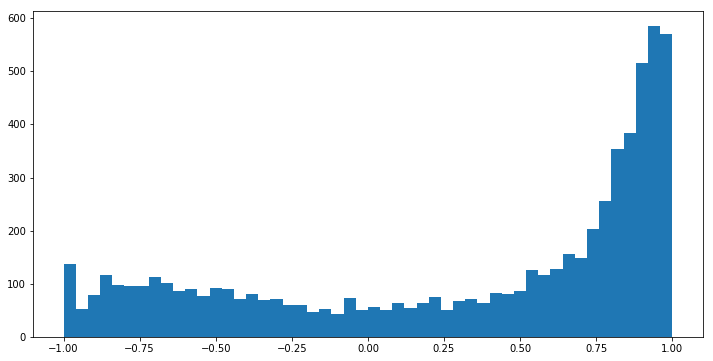

In [11]:
#look at the distribution of correlation to understand how important economic cyclicality is for the set of data we have

plt.figure(figsize=(12,6))
plt.hist(stocks_cyc['CGDP'],bins=50)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x22302b45240>],
 'caps': [<matplotlib.lines.Line2D at 0x22302b45470>,
 'fliers': [<matplotlib.lines.Line2D at 0x22302bd37b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x22302bd3c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x22302b45c88>,
  <matplotlib.lines.Line2D at 0x22302b45828>]}

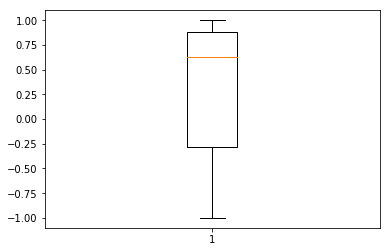

In [12]:
#use boxplot to investigate the same thing as we did just above

plt.boxplot(stocks_cyc['CGDP'])

             CGDP
count  722.000000
mean     0.007106
std      0.146925
min     -0.249936
25%     -0.119188
50%      0.011542
75%      0.135437
max      0.249590


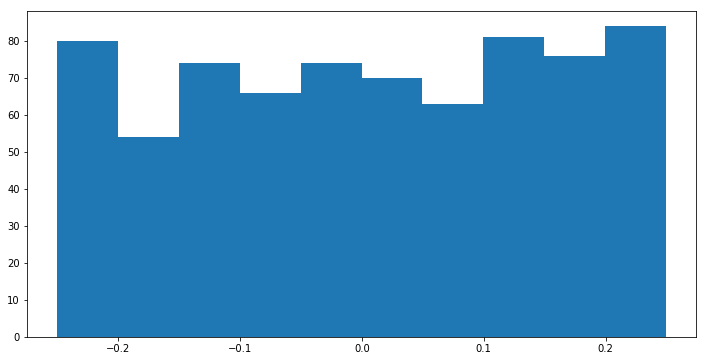

16        aaww
18          ab
51        acco
55        acfc
62        acia
65        acls
78        actg
82         acy
92        adms
100       adtn
113       aehr
123        aes
151       afty
153        agc
163       agii
165       agio
166       agle
169      agm_a
181       agro
187       agys
193      ahl_d
208        aig
210       aimt
229       akao
244       alco
245       aldr
246       aldw
266       allt
268     ally_a
286       amag
         ...  
6416      wbil
6442      wetf
6468       wgp
6474     whlrd
6491       wlb
6496      wlkp
6497       wll
6509       wnc
6511      wnrl
6519     wpg_i
6559       wtt
6563      wuba
6565      wvfc
6576       wyy
6577         x
6580      xbks
6583      xcra
6587      xelb
6589      xent
6591       xhr
6592       xin
6598      xlrn
6607       xon
6617       xrx
6624      xxii
6633       yin
6646        yy
6666      zion
6667     zionw
6679      zumz
Name: ticker, Length: 722, dtype: object


C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
#look at low correlation stocks, which are probably non-cyclical stocks
stocks_low=stocks_cyc[(stocks_cyc.CGDP>=-0.25) & (stocks_cyc.CGDP<=0.25)]
print(stocks_low.describe())

plt.figure(figsize=(12,6))
plt.hist(stocks_low['CGDP'],bins=10)
plt.show()

stocks_low['ticker']=stocks_low['ticker'].str.replace('.us.','')

print(stocks_low['ticker'])

         period                company tickers indicator       unit  amount
count    186336                 186336  186336    186336     186336  186336
unique       12                   2152    2131        10          7  119501
top     2016 Q1  Recon Technology, Ltd    RCON    Assets  US Dollar       0
freq      17043                    199     199     23455     186212    1098
['Canadian dollar', 'Japanese yen', 'Swiss franc', 'Euro', 'US Dollar', 'Malaysian ringgit', 'Chinese yuan']
['Cash and Cash Equivalents, Period Increase (Decrease)', 'Assets', 'Total Equity', 'Total Liabilities and Equity', 'Gross Profit', 'Operating Income (Loss)', 'Net Income (Loss)', 'Income from Continuing Operations before Taxes', 'Final Revenue', 'Cash and Cash Equivalents, at Carrying Value']
         period                                 company tickers  \
0       2014 Q1  1347 Property Insurance Holdings, Inc.     PIH   
1       2014 Q1  1347 Property Insurance Holdings, Inc.     PIH   
2       2014 Q1

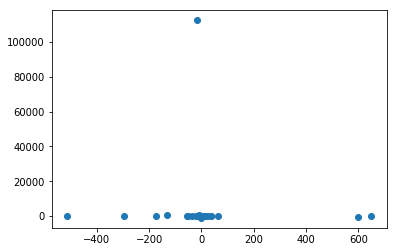

indicator                    ROE         ROA
tickers                                     
AAL                     0.320666    0.024244
AAPL                    0.095442    0.043646
ACIA                    0.428186    0.114111
ADMA                    1.691056   -0.167185
AEHR                    0.194321   -0.105352
AEMD                    0.810239   -1.338133
AERI                   11.964113   -0.122870
AHGP                    0.102212    0.025034
AHPA, AHPAU, AHPAW      0.218180   -0.009102
ALBO                    0.091339   -0.172307
ALCO                    0.124996    0.090965
AMEH                    0.257996   -0.091982
AMPD, WKHS              0.835283   -0.394062
AMRB                    0.190731   -3.211154
AMRN                    0.389545   -0.133688
AMRS                    0.233567   -0.297209
AOBC, SWHC              0.098698    0.042340
ARRY                    0.140888   -0.098847
ASTE                  649.527488  184.038460
ATEC                    0.582387   -0.123522
ATLC      

In [14]:
#Look at NASDAQ and investigate which companies does not satisfy a minimum of 8% return on equity
print(nasdaq.describe())
mylist=list(set(nasdaq['unit']))
print(mylist)
mylist2=list(set(nasdaq['indicator']))
print(mylist2)

nasdaq['amount']=pd.to_numeric(nasdaq['amount'].str.replace(',',''), errors='coerce')
print(nasdaq)

ndqfun=nasdaq.pivot_table(index=['tickers','period'], columns='indicator', values='amount', aggfunc=np.mean).round()

ndqfun['ROA']=ndqfun['Net Income (Loss)']/ndqfun['Assets']
ndqfun['ROE']=ndqfun['Net Income (Loss)']/ndqfun['Total Equity']

ndqmin=ndqfun.groupby(by='tickers')['ROE','ROA'].mean()

ndqmin=ndqmin[ndqmin['ROE']!=-np.inf]
ndqmin=ndqmin[ndqmin['ROA']!=-np.inf]
ndqmin=ndqmin[ndqmin['ROE']!=np.inf]
ndqmin=ndqmin[ndqmin['ROA']!=np.inf]

ndqmin=ndqmin.dropna()

#scatter plot
plt.plot(ndqmin['ROE'],ndqmin['ROA'],'o')
plt.show()

ndqtest=ndqmin[ndqmin['ROE']>=0.08]
print(ndqtest)

#clear out outliers
ndqwoo=ndqmin[(ndqmin.ROE<1) & (ndqmin.ROA<1)]
ndqwoo=ndqwoo[(ndqwoo.ROE>=0.08) & (ndqwoo.ROA>0)]
print(ndqwoo)



      Unnamed: 0              Date Ticker         Price  DE Ratio  \
0              0   1/30/2004 19:01      a  3.383200e+01     0.407   
1              1    4/13/2004 4:07      a  2.846260e+01     0.375   
2              2  12/13/2004 21:37      a  2.188160e+01     0.323   
3              3    1/22/2005 5:17      a  2.024780e+01     0.322   
4              4     1/9/2006 2:35      a  3.171180e+01     2.169   
5              5   6/21/2006 11:01      a  2.997710e+01     0.368   
6              6   8/19/2006 10:42      a  2.938050e+01     0.396   
7              7   2/20/2007 17:46      a  3.162040e+01     0.411   
8              8    4/12/2007 5:07      a  3.393670e+01     0.411   
9              9   1/23/2008 19:28      a  3.253530e+01     0.645   
10            10    2/14/2008 4:44      a  3.069590e+01     0.645   
11            11    4/26/2008 4:49      a  3.020920e+01     0.670   
12            12   12/6/2008 19:21      a  1.771290e+01     0.830   
13            13     8/2/2009 5:46

C:\Users\trinh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


Ticker
a        3.637222
aa       1.265312
aapl     4.761463
abbv    23.320000
abc      2.370000
abt      4.438182
ace      1.135455
aci      2.407647
acn     11.420000
act      3.840000
adbe     4.924667
adi      3.509130
adm      1.622727
adp      4.372381
adsk     7.222778
adt      2.055000
aee      1.365385
aeo      2.615833
aep      1.584000
aes      5.900769
aet      2.037059
afl      2.531250
agn      7.406471
aig      1.004667
aiv      2.541429
aiz      1.328667
akam     5.625556
all      1.250667
altr     5.361765
alxn     9.388889
          ...    
wat     11.480000
wdc      2.280476
wec      2.140000
wfc      1.927576
wfm      4.336667
whr      2.132727
win      7.698571
wlp      1.341250
wm       1.823333
wmb      3.361333
wmt      3.516441
wtw     22.195714
wu      25.445000
wy       2.144286
wyn      1.861667
wynn     7.691818
x        1.785333
xel      1.382857
xl       0.877273
xlnx     3.580000
xom      2.771918
xray     3.153333
xrx      1.685000
xyl      2.430000
yho

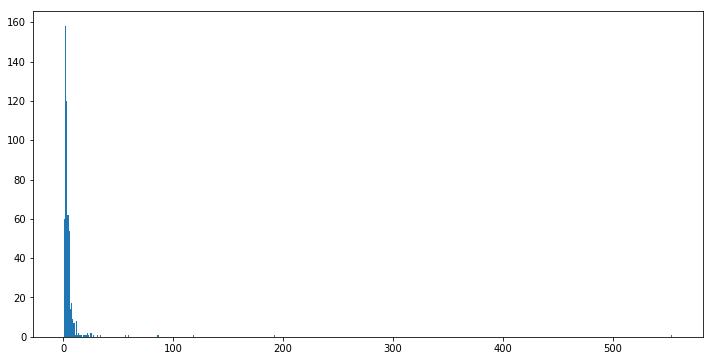

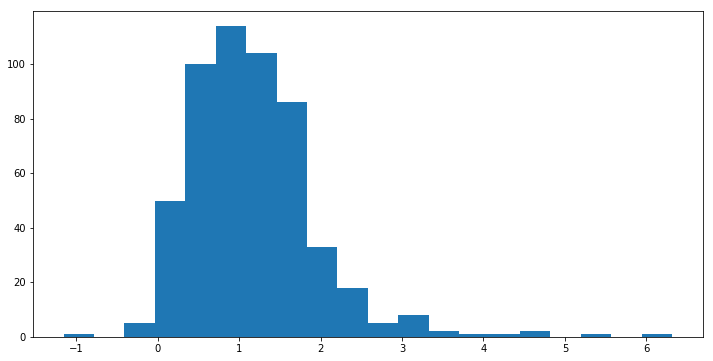

       Price/Book       lpb
count    8.000000  8.000000
mean     0.826415 -0.241056
std      0.222334  0.382041
min      0.314400 -1.157089
25%      0.836250 -0.181418
50%      0.885422 -0.121733
75%      0.953274 -0.047950
max      0.999091 -0.000910
       Price/Book         lpb
count  532.000000  532.000000
mean     5.960206    1.164710
std     26.401432    0.778171
min      0.314400   -1.157089
25%      1.889333    0.636224
50%      2.946136    1.080495
75%      4.698897    1.547312
max    554.450000    6.317977


In [15]:
#look at Price/Book value to determine investors sentiment with regards to S&P500 stocks
print(sp500)
print(sp500['Date'].describe())

sp500['Date']=pd.to_datetime(sp500['Date'])

a_columns=['Date','Ticker','Price/Book']

sp500_a=sp500.ix[:,a_columns]

sp500_a=sp500_a.dropna()

sp500_b=sp500_a.groupby(by='Ticker')['Price/Book'].mean()

print(sp500_b)

sp500_b=sp500_b.to_frame()
sp500_b=sp500_b.reset_index()

plt.figure(figsize=(12,6))
plt.hist(sp500_b['Price/Book'],bins=500)
plt.show()

sp500_b['lpb']=np.log(sp500_b['Price/Book'])

plt.figure(figsize=(12,6))
plt.hist(sp500_b['lpb'],bins=20)
plt.show()

sp500_c=sp500_b[sp500_b['Price/Book']<1]
print(sp500_c.describe())
print(sp500_b.describe())